# ISLR Chapter 10 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i$th and $j$th observations, then the quantity $1 - r_{ij}$ is proportional to the squared Euclidean distance between the $i$th and $j$th observations.

### On the `USArrests` data, show that this proportionality holds.

Hint: The Euclidean distance can be calculated using the `dist()` function, and correlations can be calculated using the `cor()` function.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from itertools import product

USArrests = pd.read_csv('USArrests.csv', index_col=0)

scale = StandardScaler()

# transpose to scale by observation instead of variable, transpose back to original shape
scaled = scale.fit_transform(USArrests.T).T
# distances
sq_dist = euclidean_distances(scaled, scaled)**2
# correlations
cor = (1-np.corrcoef(scaled))
# ratios
# note Python uses n instead of n-1 for sd, 
# resulting in a different ratio value than R, but still constant
ratios = [cor[i,j]/sq_dist[i,j] for i, j in product(range(50), repeat=2) if i < j]

print('The minimum ratio is %.3f and the maximum ratio is %.3f.' % (np.min(ratios), np.max(ratios)))

The minimum ratio is 0.125 and the maximum ratio is 0.125.


### 8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the `sdev` output of the `prcomp()` function.

### On the `USArrests` data, calculate PVE in two ways:

#### (a) Using the sdev output of the `prcomp()` function, as was done in Section 10.2.3.

#### (b) By applying Equation 10.8 directly. That is, use the `prcomp()` function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

These two approaches should give the same results.

Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed `prcomp()` using centered and scaled variables, then you must center and scale the variables before applying Equation 10.3 in (b).

In [2]:
from sklearn.decomposition import PCA
pca = PCA()
X = scale.fit_transform(USArrests)
pca.fit(X)
# Even better, in python we have it directly
print(pca.explained_variance_ratio_)

[0.62006039 0.24744129 0.0891408  0.04335752]


Equation 10.8:
$$
\frac{\sum_{i=1}^n\left(\sum_{j=1}^p\phi_{jm}x_{ij}\right)^2}{\sum_{j=1}^p\sum_{i=1}^nx^2_{ij}}
$$

In [3]:
np.sum(pca.transform(X)**2, axis=0)/np.sum(X**2)

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### 9. Consider the `USArrests` data. We will now perform hierarchical clustering on the states.

#### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

#### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

#### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

#### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#### plot function from sklearn help pages 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
####

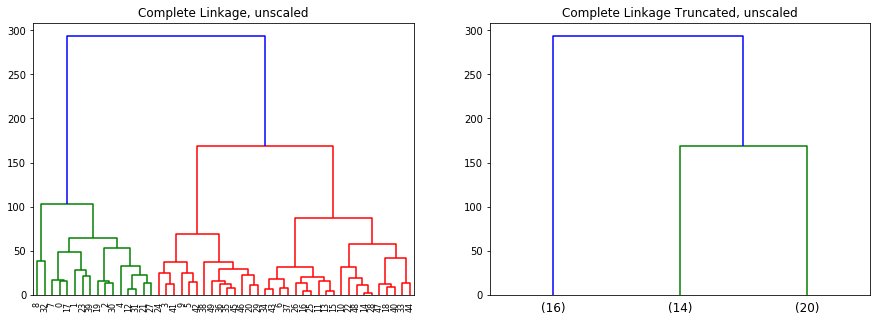

[('Alabama', 0),
 ('Alaska', 0),
 ('Arizona', 0),
 ('Arkansas', 2),
 ('California', 0),
 ('Colorado', 2),
 ('Connecticut', 1),
 ('Delaware', 0),
 ('Florida', 0),
 ('Georgia', 2),
 ('Hawaii', 1),
 ('Idaho', 1),
 ('Illinois', 0),
 ('Indiana', 1),
 ('Iowa', 1),
 ('Kansas', 1),
 ('Kentucky', 1),
 ('Louisiana', 0),
 ('Maine', 1),
 ('Maryland', 0),
 ('Massachusetts', 2),
 ('Michigan', 0),
 ('Minnesota', 1),
 ('Mississippi', 0),
 ('Missouri', 2),
 ('Montana', 1),
 ('Nebraska', 1),
 ('Nevada', 0),
 ('New Hampshire', 1),
 ('New Jersey', 2),
 ('New Mexico', 0),
 ('New York', 0),
 ('North Carolina', 0),
 ('North Dakota', 1),
 ('Ohio', 1),
 ('Oklahoma', 2),
 ('Oregon', 2),
 ('Pennsylvania', 1),
 ('Rhode Island', 2),
 ('South Carolina', 0),
 ('South Dakota', 1),
 ('Tennessee', 2),
 ('Texas', 2),
 ('Utah', 1),
 ('Vermont', 1),
 ('Virginia', 2),
 ('Washington', 2),
 ('West Virginia', 1),
 ('Wisconsin', 1),
 ('Wyoming', 2)]

In [5]:
h_complete = AgglomerativeClustering(linkage = 'complete', distance_threshold=0, n_clusters=None)
h_complete.fit(USArrests)
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_dendrogram(h_complete, truncate_mode=None, ax=ax[0])
ax[0].set_title('Complete Linkage, unscaled')

plot_dendrogram(h_complete, truncate_mode='lastp',p=3, ax=ax[1])
ax[1].set_title('Complete Linkage Truncated, unscaled')
plt.show()

h_complete.set_params(distance_threshold=None, n_clusters=3)
list(zip(USArrests.index,h_complete.fit_predict(USArrests)))

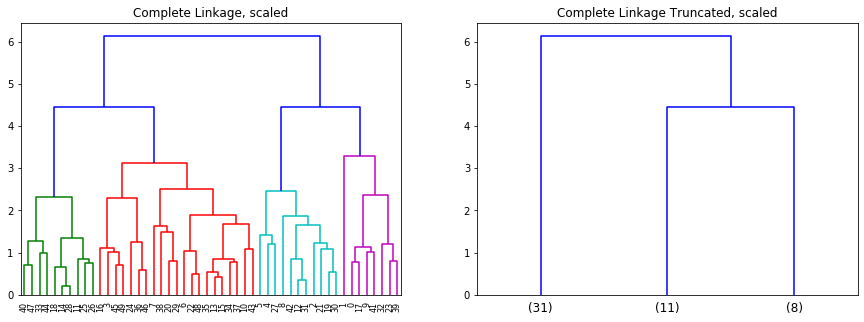

[('Alabama', 1),
 ('Alaska', 1),
 ('Arizona', 2),
 ('Arkansas', 0),
 ('California', 2),
 ('Colorado', 2),
 ('Connecticut', 0),
 ('Delaware', 0),
 ('Florida', 2),
 ('Georgia', 1),
 ('Hawaii', 0),
 ('Idaho', 0),
 ('Illinois', 2),
 ('Indiana', 0),
 ('Iowa', 0),
 ('Kansas', 0),
 ('Kentucky', 0),
 ('Louisiana', 1),
 ('Maine', 0),
 ('Maryland', 2),
 ('Massachusetts', 0),
 ('Michigan', 2),
 ('Minnesota', 0),
 ('Mississippi', 1),
 ('Missouri', 0),
 ('Montana', 0),
 ('Nebraska', 0),
 ('Nevada', 2),
 ('New Hampshire', 0),
 ('New Jersey', 0),
 ('New Mexico', 2),
 ('New York', 2),
 ('North Carolina', 1),
 ('North Dakota', 0),
 ('Ohio', 0),
 ('Oklahoma', 0),
 ('Oregon', 0),
 ('Pennsylvania', 0),
 ('Rhode Island', 0),
 ('South Carolina', 1),
 ('South Dakota', 0),
 ('Tennessee', 1),
 ('Texas', 2),
 ('Utah', 0),
 ('Vermont', 0),
 ('Virginia', 0),
 ('Washington', 0),
 ('West Virginia', 0),
 ('Wisconsin', 0),
 ('Wyoming', 0)]

In [6]:
h_complete = AgglomerativeClustering(linkage = 'complete', distance_threshold=0, n_clusters=None)
h_complete.fit(X)
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_dendrogram(h_complete, truncate_mode=None, ax=ax[0])
ax[0].set_title('Complete Linkage, scaled')

plot_dendrogram(h_complete, truncate_mode='lastp',p=3, ax=ax[1])
ax[1].set_title('Complete Linkage Truncated, scaled')
plt.show()

h_complete.set_params(distance_threshold=None, n_clusters=3)
list(zip(USArrests.index,h_complete.fit_predict(X)))

*Big difference in outcomes. Scaling variables will make the clustering unit independent and would be my preferred method unless all measures are in the same unit.*

### 10. In this problem, you will generate simulated data, and then perform PCA and $K$-means clustering on the data.

#### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

Hint: There are a number of functions in `R` that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

#### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

#### (c) Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?

Hint: You can use the `table()` function in `R` to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: $K$-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

#### (d) Perform $K$-means clustering with $K = 2$. Describe your results.

#### (e) Now perform $K$-means clustering with $K = 4$, and describe your results.

#### (f) Now perform $K$-means clustering with $K = 3$ on the first two principal component score vectors, rather than on the raw data. That is, perform $K$-means clustering on the $60 \times 2$ matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

#### (g) Using the `scale()` function, perform $K$-means clustering with $K = 3$ on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [7]:
p = 50
cl = 3
no = 20

np.random.seed(123)
X = np.random.normal(1,3,(cl*no,p))
y = np.ones(no*cl)
for i in range(cl):
    b = np.random.normal(0, 1.5, p)
    start = no*i
    finish = no*(i+1)
    X[start:finish,:] += b
    y[start:finish]= np.ones(no)+i
    
X.shape

(60, 50)

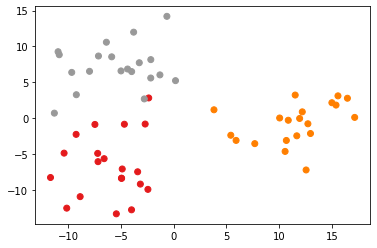

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
XX = pca.fit_transform(X)

plt.scatter(XX[:,0],XX[:,1], c = y, cmap=plt.cm.Set1)
plt.show()

In [9]:
from sklearn.cluster import KMeans

km3 = KMeans(3, n_init=100)
ykm3 = km3.fit_predict(X) + 1
print(pd.crosstab(y,ykm3))
print('One misclassified obs')

col_0   1   2   3
row_0            
1.0     1  19   0
2.0     0   0  20
3.0    20   0   0
One misclassified obs


In [10]:
km4 = KMeans(4, n_init=100)
ykm4 = km4.fit_predict(X) + 1
print(pd.crosstab(y,ykm4))
print('Real cluster 3 got divided in 2, 2 missclassified obs.')

col_0   1  2   3   4
row_0               
1.0     0  2   0  18
2.0     0  1  19   0
3.0    11  9   0   0
Real cluster 3 got divided in 2, 2 missclassified obs.


In [11]:
ykm3pca = km3.fit_predict(XX) + 1
print(pd.crosstab(y,ykm3pca))
print('One misclassified obs')

col_0   1   2   3
row_0            
1.0     1   0  19
2.0     0  20   0
3.0    20   0   0
One misclassified obs


In [12]:
ykm3scaled = km3.fit_predict(scale.fit_transform(X)) + 1
print(pd.crosstab(y,ykm3pca))
print('One misclassified obs')

col_0   1   2   3
row_0            
1.0     1   0  19
2.0     0  20   0
3.0    20   0   0
One misclassified obs


### 11. On the book website, www.StatLearning.com, there is a gene expression data set (`Ch10Ex11.csv`) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

#### (a) Load in the data using `read.csv()`. You will need to select `header=F`.

#### (b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

#### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

In [13]:
X = pd.read_csv('Ch10Ex11.csv',header=None).T
X.shape

(40, 1000)

In [14]:
dd = 1-np.corrcoef(X)
dd.shape

(40, 40)

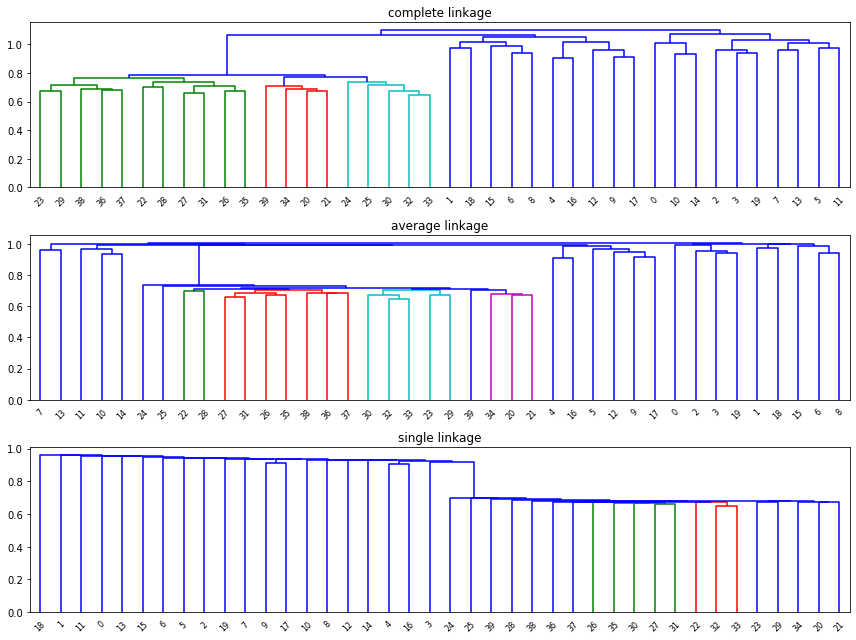

In [15]:
fig, axx = plt.subplots(3,1,figsize=(12,9))
axs = axx.ravel()

for i,m in enumerate(('complete', 'average','single')):
    hcl = AgglomerativeClustering(None,'precomputed',linkage = m, distance_threshold=0)
    hcl.fit(dd)
    plot_dendrogram(hcl, truncate_mode=None, ax=axs[i])
    axs[i].set_title('%s linkage' % m)

plt.tight_layout()
plt.show()

In [16]:
hcl.set_params(n_clusters=4, linkage='complete', distance_threshold=None)
h_complete = hcl.fit_predict(dd) 
np.bincount(h_complete)

array([10,  7,  3, 20])

In [17]:
hcl.set_params(n_clusters=8, linkage='average')
np.bincount(hcl.fit_predict(dd))

array([ 6,  3,  3,  2,  2,  3,  1, 20])

In [18]:
# complete linkage achieves the correct grouping using the least number of clusters

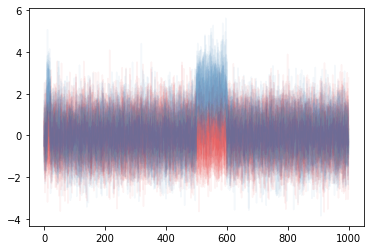

Bands where blue and red are not overlapping are the genes that differ the most.


In [19]:
X.shape
for i in range(X.shape[0]):
    plt.plot(X.T[i], c = plt.cm.Set1.colors[(h_complete[i]==3)*1], alpha=0.05)
plt.show()

print('Bands where blue and red are not overlapping are the genes that differ the most.')